# HON Metrics
Computing some metrics from the higher-order network.

In [1]:
import matplotlib
#matplotlib.use('Agg')
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import signac
from util import fetch_geodata, get_community

project = signac.get_project()
job = project.find_jobs({"year": 2011, "quarter": 1}).next()

In [2]:
hon = pd.read_csv(job.fn('hon_network.txt'), header=None, names=['source', 'dest', 'weight'])
def splitter(state_node):
    state_node = state_node.rstrip('|').split('|')
    state_node.extend(state_node.pop().split('.'))
    return state_node
hon.source = hon.source.apply(splitter)
hon.dest = hon.dest.apply(splitter)
hon['source_len'] = hon.source.apply(len)
hon['dest_len'] = hon.dest.apply(len)
hon['source_node'] = hon.source.apply(lambda x: int(x[0]))
hon['dest_node'] = hon.dest.apply(lambda x: int(x[0]))

In [3]:
histories = {}
for field in ('source_node', 'dest_node'):
    histories[field] = {}
    for node, group in hon.groupby(field):
        histories[field][node] = np.average(group.source_len, weights=group.weight)
histories = pd.DataFrame.from_dict(histories)

In [4]:
airport_codes = pd.read_csv(project.fn('airport_codes.csv')).set_index('ID')
histories = pd.merge(histories, airport_codes, left_index=True, right_index=True)
histories = pd.merge(histories, fetch_geodata(), left_on='IATA', right_index=True)
last_quarter_pageranks = pd.read_csv(
    project.find_jobs({'year': 2018, 'quarter': 3}).next().fn('first_order_pagerank.txt'),
    header=None, names=['ID', 'PageRank']
).set_index('ID')
histories = histories.merge(last_quarter_pageranks, left_index=True, right_index=True)

Reading airport geodata...


In [5]:
histories

,source_node,dest_node,IATA,name,lon,lat,PageRank
10135,1.491404,1.909071,ABE,Lehigh Valley International Airport,-75.440804,40.652100,0.000900
10136,1.535097,1.882794,ABI,Abilene Regional Airport,-99.681900,32.411301,0.000506
10140,1.753081,1.861460,ABQ,Albuquerque International Sunport,-106.609001,35.040199,0.003718
10141,1.660714,1.850829,ABR,Aberdeen Regional Airport,-98.421799,45.449100,0.000417
10146,1.566497,1.782059,ABY,Southwest Georgia Regional Airport,-84.194504,31.535500,0.000423
10154,2.023736,1.738165,ACK,Nantucket Memorial Airport,-70.060204,41.253101,0.000908
10155,1.607347,2.056483,ACT,Waco Regional Airport,-97.230499,31.611300,0.000471
10157,1.629499,1.843427,ACV,California Redwood Coast-Humboldt County Airport,-124.109000,40.978101,0.000472
10158,1.422297,1.500817,ACY,Atlantic City International Airport,-74.577202,39.457600,0.000549
10185,1.614674,1.832789,AEX,Alexandria International Airport,-92.549797,31.327400,0.000533


In [6]:
def plot_source_histories(paths):
    print('Generating plot...')
    fig = plt.figure(figsize=(6, 4), dpi=400)
    ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())
    ax.set_extent([-128, -64, 22, 49], ccrs.Geodetic())

    shapename = 'admin_1_states_provinces_shp'
    states_shp = shpreader.natural_earth(resolution='110m',
                                         category='cultural', name=shapename)

    ax.background_patch.set_visible(False)
    ax.outline_patch.set_visible(False)
    plt.title('Average Airport Order in HON Sources, {year}Q{quarter}'.format(**job.sp))

    def colorize_state(geometry):
        facecolor = (0.9375, 0.9375, 0.8594)
        return {'facecolor': facecolor, 'edgecolor': 'black'}

    ax.add_geometries(
        shpreader.Reader(states_shp).geometries(),
        ccrs.PlateCarree(),
        styler=colorize_state)

    xs = paths.lon.values
    ys = paths.lat.values
    colors = paths.source_node
    sizes = 10000*paths.PageRank.values
    dots = ax.scatter(xs, ys, transform=ccrs.PlateCarree(), c=colors, s=sizes,
                      alpha=0.8, zorder=10, cmap='viridis')

    top_n = paths.sort_values('PageRank', ascending=False).head(20).index
    for row in paths.loc[top_n].itertuples():
        ax.annotate(row.IATA, (row.lon, row.lat), xycoords=ccrs.PlateCarree()._as_mpl_transform(ax),
                    fontsize=30*row.PageRank**0.2,
                    zorder=11, ha='center', va='center')
    cbax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
    cbar = plt.colorbar(dots, cax=cbax)
    cbar.ax.set_ylabel('Average order')
    plt.show()
    plt.close()

Generating plot...


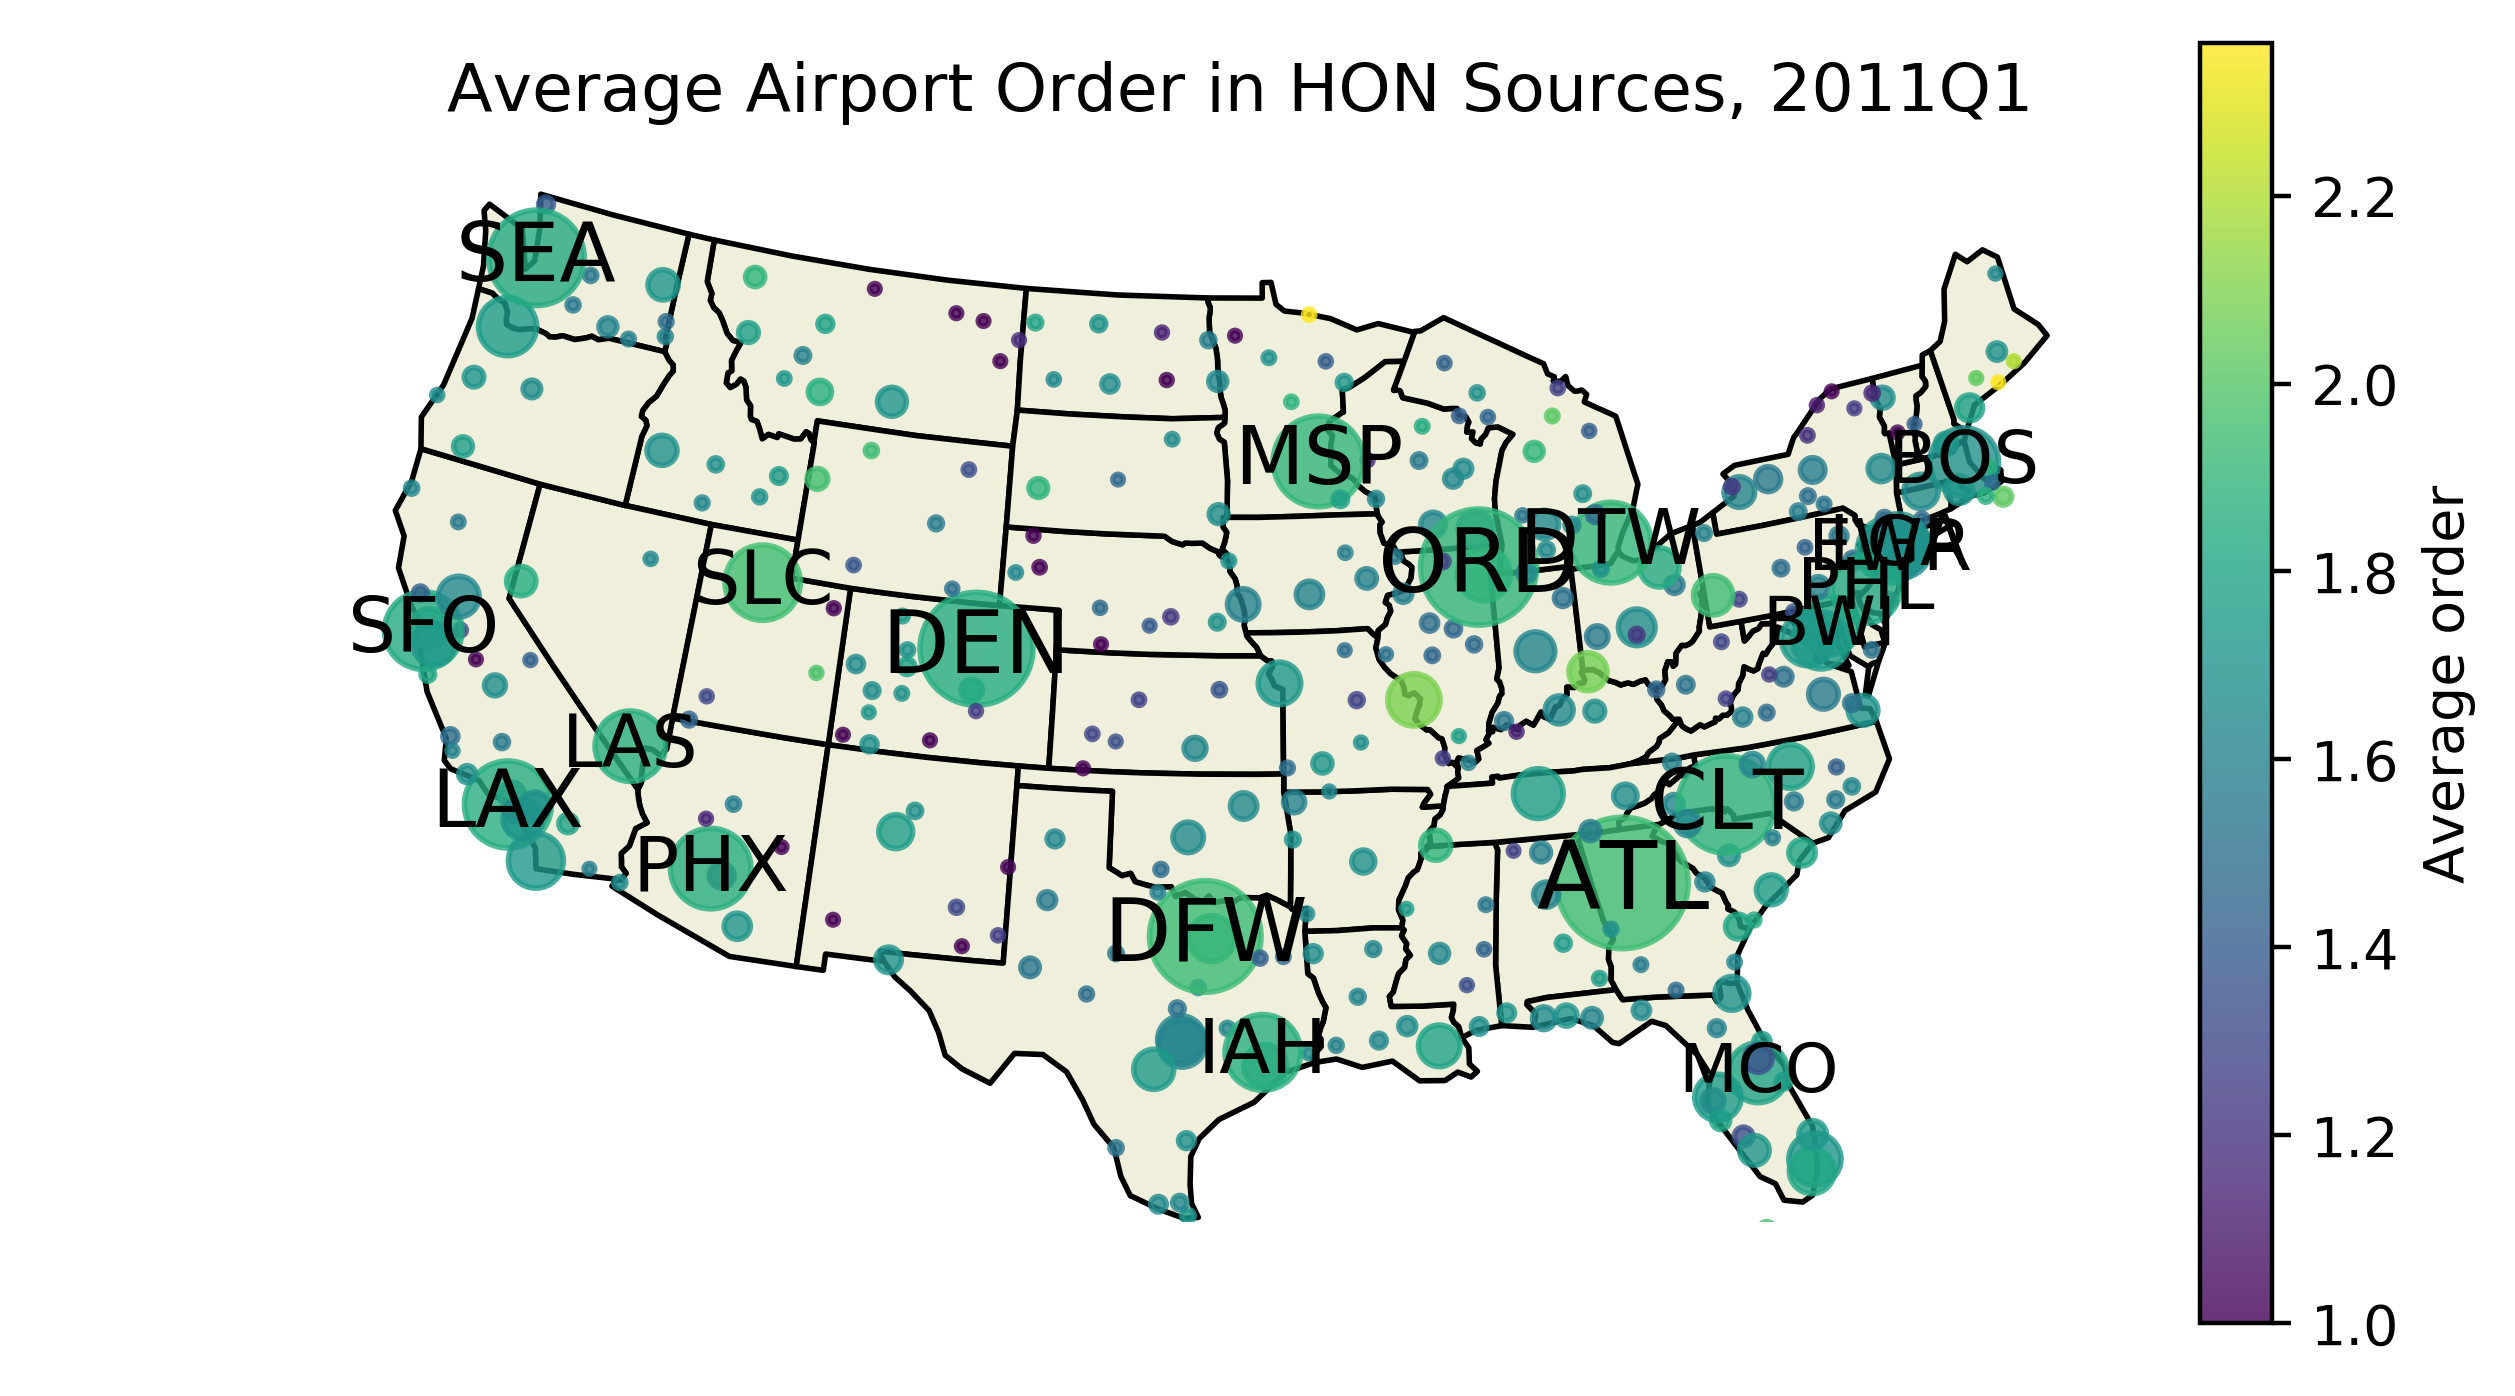

In [7]:
plot_source_histories(histories)

In [8]:
def plot_dest_histories(paths):
    print('Generating plot...')
    fig = plt.figure(figsize=(6, 4), dpi=400)
    ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())
    ax.set_extent([-128, -64, 22, 49], ccrs.Geodetic())

    shapename = 'admin_1_states_provinces_shp'
    states_shp = shpreader.natural_earth(resolution='110m',
                                         category='cultural', name=shapename)

    ax.background_patch.set_visible(False)
    ax.outline_patch.set_visible(False)
    plt.title('Average Airport Order in HON Destinations, {year}Q{quarter}'.format(**job.sp))

    def colorize_state(geometry):
        facecolor = (0.9375, 0.9375, 0.8594)
        return {'facecolor': facecolor, 'edgecolor': 'black'}

    ax.add_geometries(
        shpreader.Reader(states_shp).geometries(),
        ccrs.PlateCarree(),
        styler=colorize_state)

    xs = paths.lon.values
    ys = paths.lat.values
    colors = paths.dest_node
    sizes = 10000*paths.PageRank.values
    dots = ax.scatter(xs, ys, transform=ccrs.PlateCarree(), c=colors, s=sizes,
                      alpha=0.8, zorder=10, cmap='viridis')

    top_n = paths.sort_values('PageRank', ascending=False).head(20).index
    for row in paths.loc[top_n].itertuples():
        ax.annotate(row.IATA, (row.lon, row.lat), xycoords=ccrs.PlateCarree()._as_mpl_transform(ax),
                    fontsize=30*row.PageRank**0.2,
                    zorder=11, ha='center', va='center')
    cbax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
    cbar = plt.colorbar(dots, cax=cbax)
    cbar.ax.set_ylabel('Average order')
    plt.show()
    plt.close()

Generating plot...


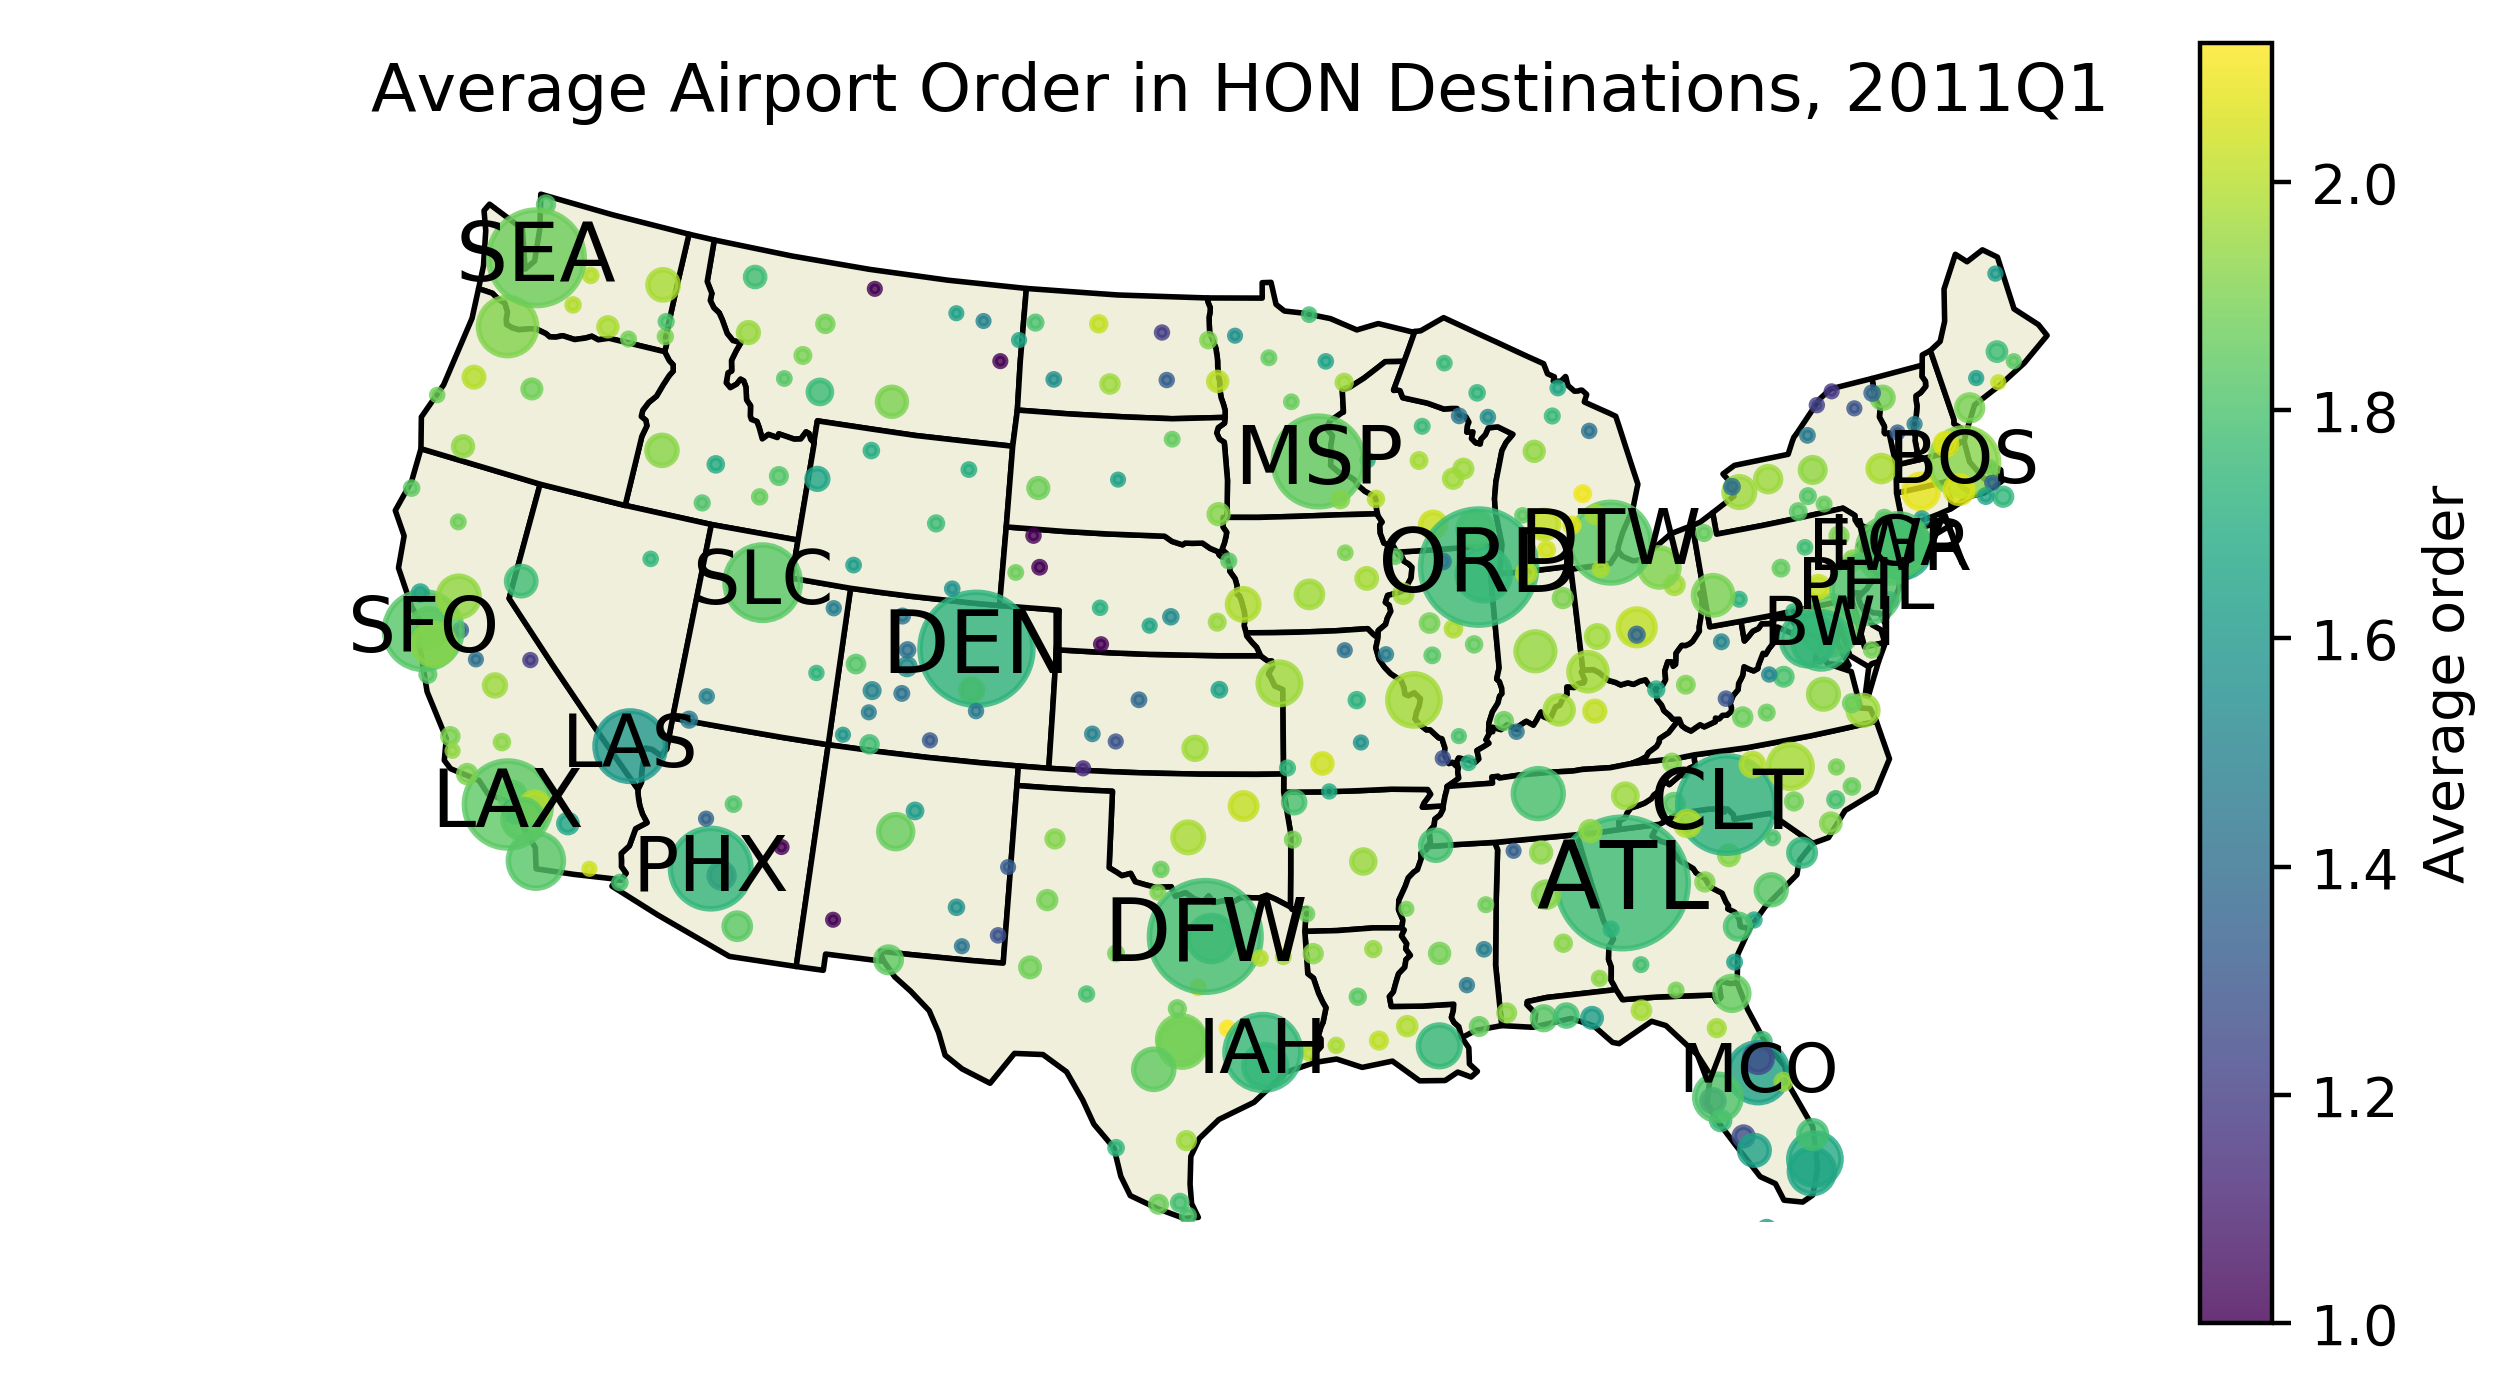

In [9]:
plot_dest_histories(histories)

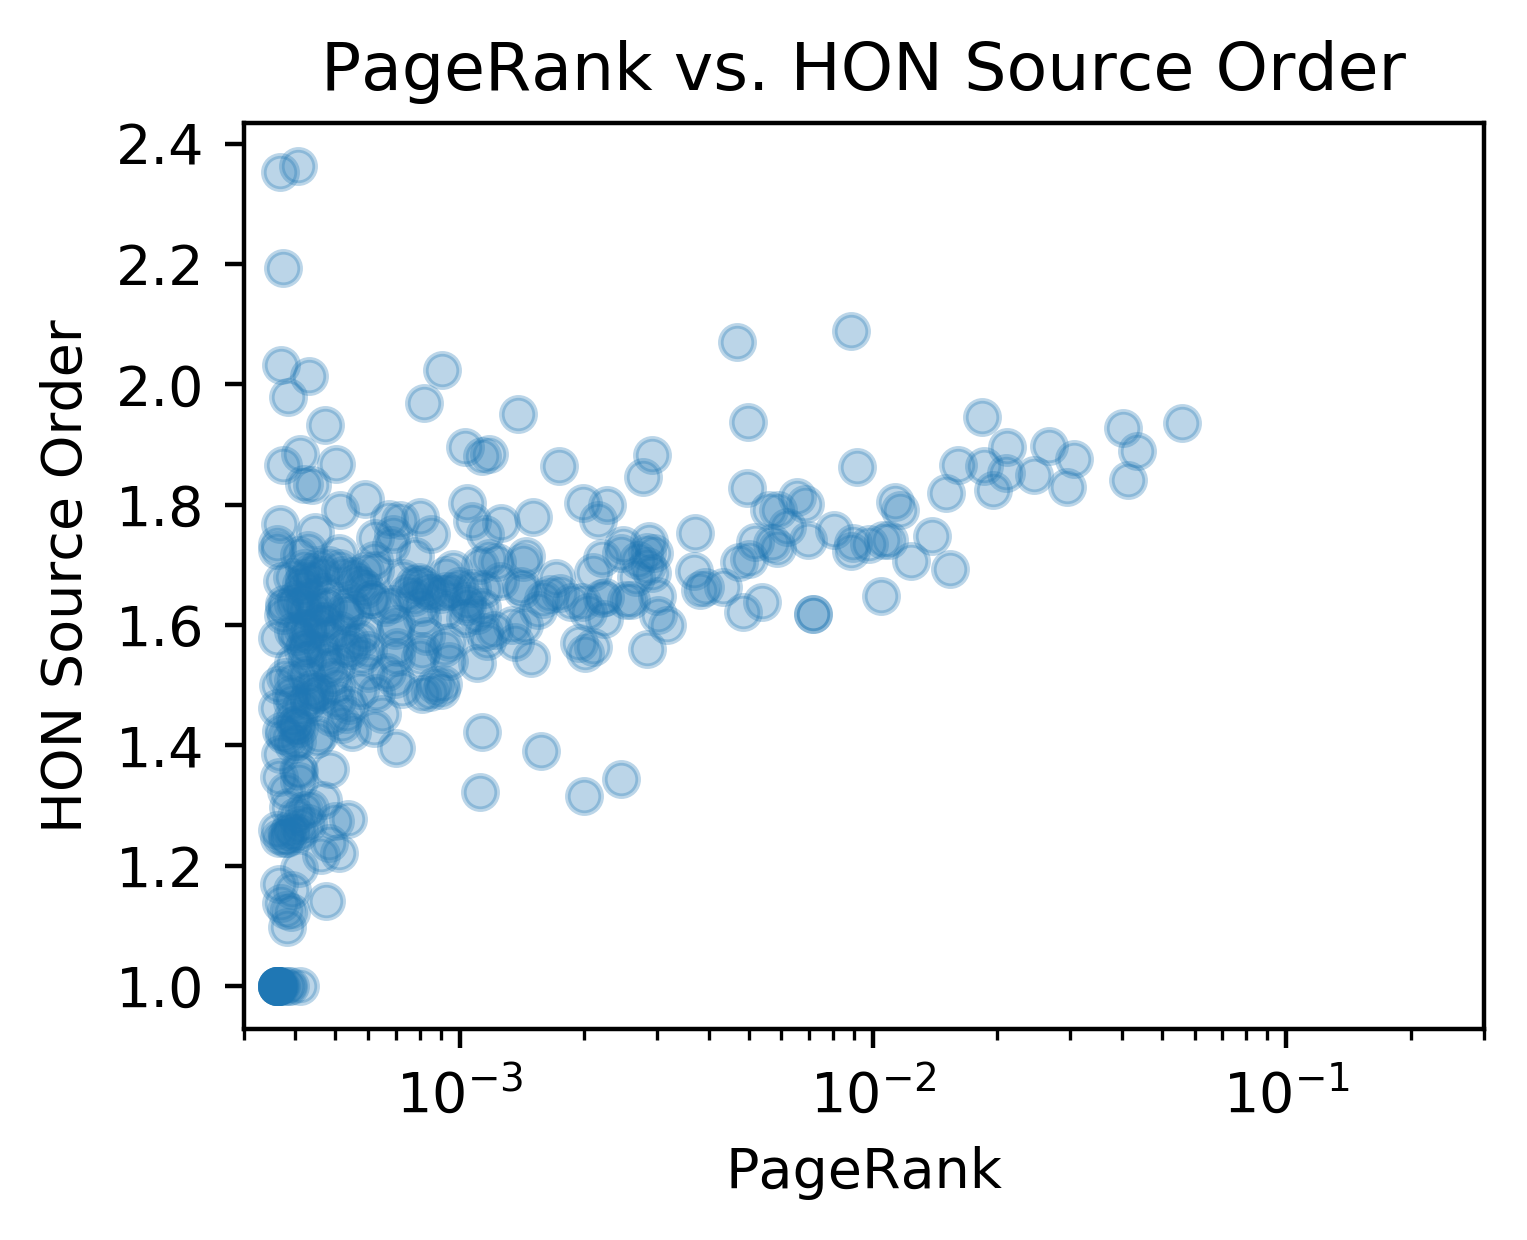

In [10]:
plt.figure(figsize=(4, 3), dpi=400)
plt.scatter(histories.PageRank, histories.source_node, alpha=0.3)
plt.title('PageRank vs. HON Source Order')
plt.xscale('log')
plt.xlim(3e-4, 0.3)
plt.xlabel('PageRank')
plt.ylabel('HON Source Order')
plt.show()

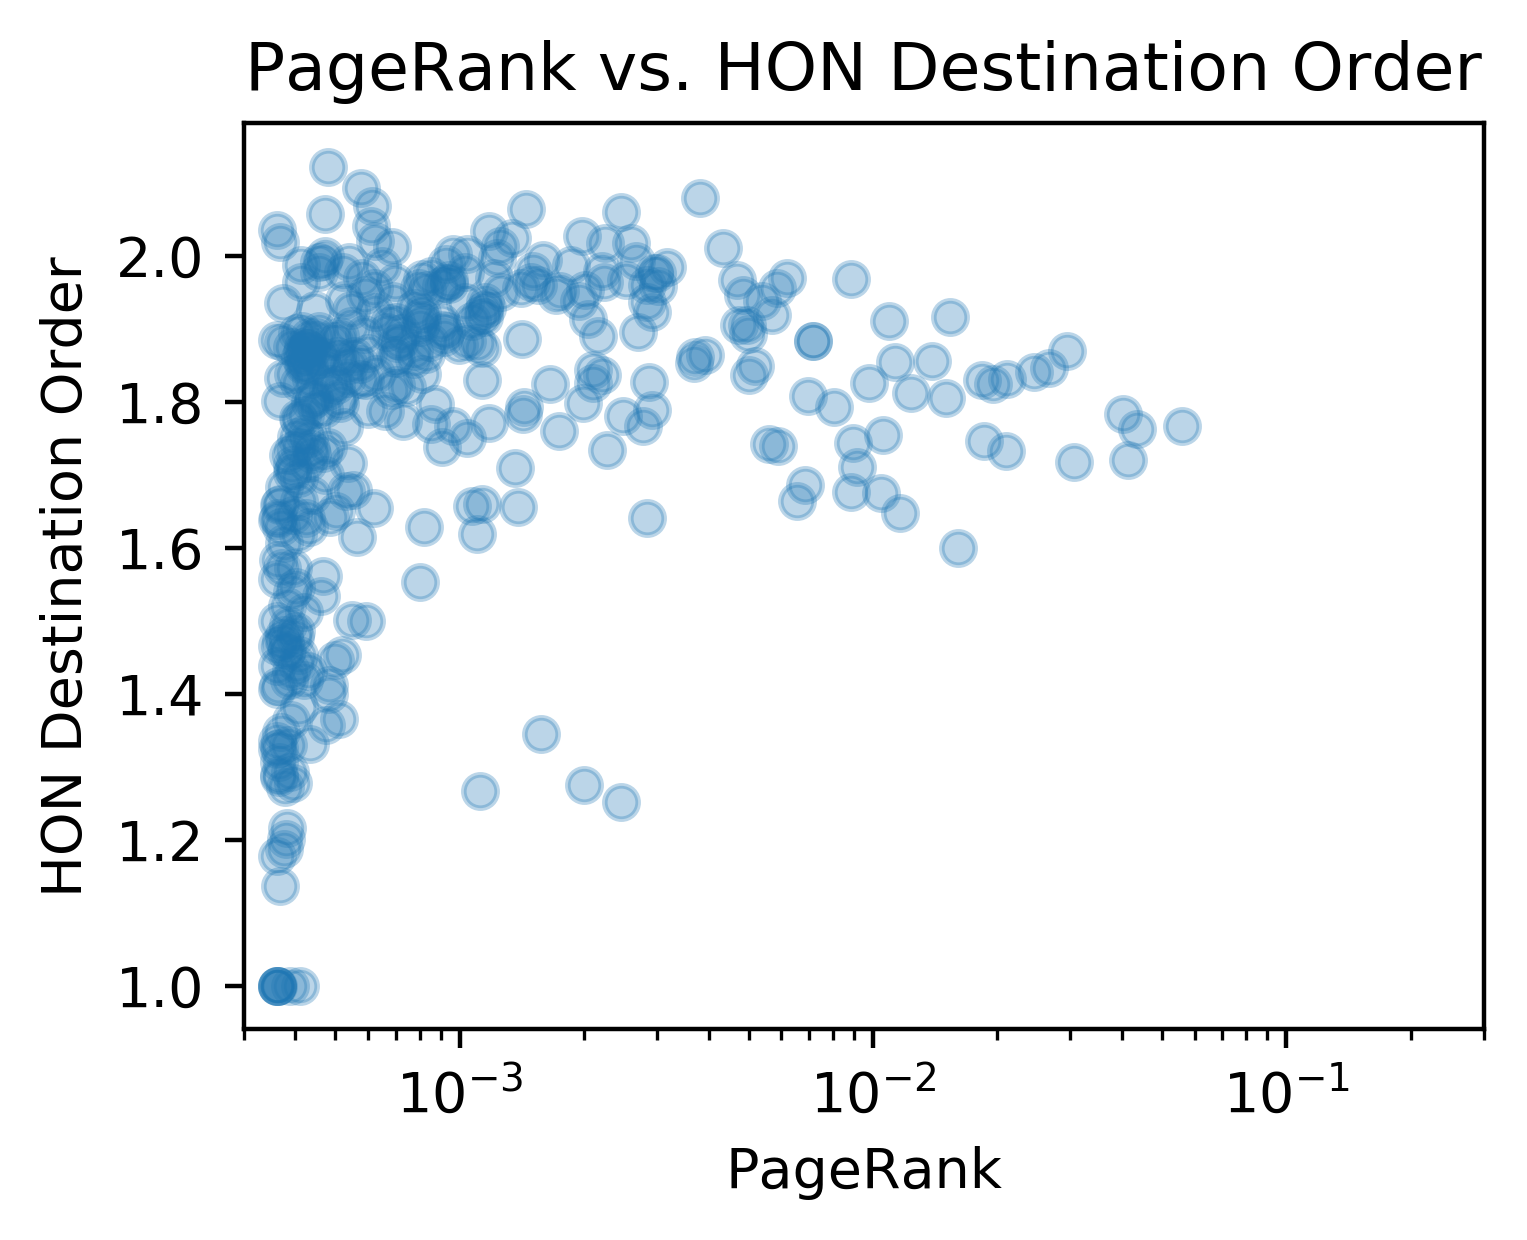

In [11]:
plt.figure(figsize=(4, 3), dpi=400)
plt.scatter(histories.PageRank, histories.dest_node, alpha=0.3)
plt.title('PageRank vs. HON Destination Order')
plt.xscale('log')
plt.xlim(3e-4, 0.3)
plt.xlabel('PageRank')
plt.ylabel('HON Destination Order')
plt.show()